Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.4294 - accuracy: 0.8720 - val_loss: 0.1658 - val_accuracy: 0.9511
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1739 - accuracy: 0.9495 - val_loss: 0.1308 - val_accuracy: 0.9597
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1285 - accuracy: 0.9624 - val_loss: 0.1044 - val_accuracy: 0.9676
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.0959 - val_accuracy: 0.9701
Epoch 5/15
469/469 [==============================] - 4s 7ms/step - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.0922 - val_accuracy: 0.9733
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0751 - accuracy: 0.9763 - val_loss: 0.0846 - val_accuracy: 0.9743
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.0802 - val_accuracy: 0.9749
Epoch 

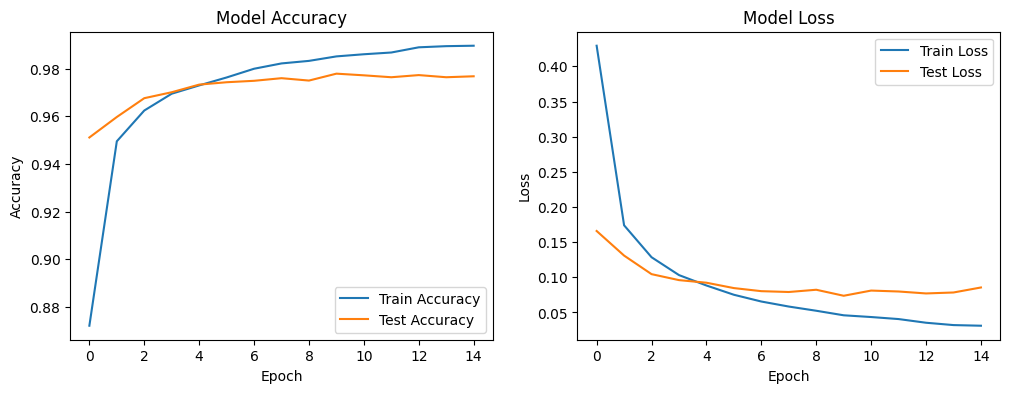

In [7]:
# 1. Import libraries and modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
from six.moves import urllib

# Custom download function
def load_mnist():
    # Alternative URL
    alternative_url = 'https://s3.amazonaws.com/img-datasets/mnist.npz'
    path = tf.keras.utils.get_file(
        'mnist.npz',
        origin=alternative_url,
        file_hash='8a61469f7ea1b51cbae51d4f78837e45')
    with np.load(path) as data:
        return (data['x_train'], data['y_train']), (data['x_test'], data['y_test'])

# Load data
(x_train, y_train_original), (x_test, y_test_original) = load_mnist()


# 3. Preprocess input data
# Flatten 28x28 images to 784-dimensional vectors
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

# Normalize to [0, 1]
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_original, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_original, num_classes)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
#model.add(Dense(250, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 7. Fit model on training data
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_test, y_test))

# 8. Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


Epoch 1/50
235/235 [==============================] - 8s 25ms/step - loss: 1.2918 - accuracy: 0.8865 - val_loss: 1.1325 - val_accuracy: 0.9316 - lr: 5.0000e-04
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.8501 - accuracy: 0.9589 - val_loss: 0.7391 - val_accuracy: 0.9686 - lr: 5.0000e-04
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.6626 - accuracy: 0.9709 - val_loss: 0.5902 - val_accuracy: 0.9743 - lr: 5.0000e-04
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.5268 - accuracy: 0.9767 - val_loss: 0.4795 - val_accuracy: 0.9766 - lr: 5.0000e-04
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.4271 - accuracy: 0.9801 - val_loss: 0.4205 - val_accuracy: 0.9706 - lr: 5.0000e-04
Epoch 6/50
235/235 [==============================] - 5s 23ms/step - loss: 0.3488 - accuracy: 0.9831 - val_loss: 0.3384 - val_accuracy: 0.9771 - lr: 5.0000e-04
Epoch 7/50
235/235 [====================

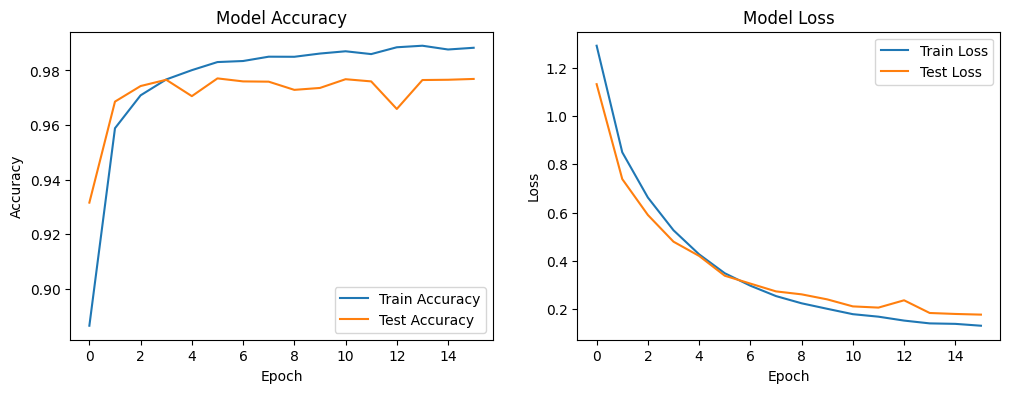


Test accuracy: 0.9771


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, y_train_original), (x_test, y_test_original) = mnist.load_data()

# 3. Preprocess input data
# Flatten 28x28 images to 784-dimensional vectors
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

# Normalize to [0, 1]
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_original, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_original, num_classes)

# 5. Define improved model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

# 6. Compile model with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# 7. Define callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
]

# 8. Fit model on training data
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks,
                    verbose=1)

# 9. Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')

In [11]:
model.save('MNIST_digits.h5')